# G2M-insight-for-Cab-Investment-firm

### import Neccessary modules 

In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

### import Neccessary given dataset 

In [2]:
# Import data from dataset
cab_df = pd.read_csv("cab_Data.csv")
city_df = pd.read_csv("City.csv")
customer_ID_df = pd.read_csv("Customer_ID.csv")
transaction_ID_df = pd.read_csv("Transaction_ID.csv")

### Checking given data

cab data

In [3]:
# Checking data info
cab_df.info() # No empty data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
# Checking 5 of the first data
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
# Checking datatype
# Have to change Date_of_Travel into Dateime datatype
# 1
cab_df.dtypes 

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [6]:
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [7]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Total company

In [8]:
cab_df["Company"].nunique()

2

In [9]:
cab_df["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

Customer ID data


In [10]:
customer_ID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
customer_ID_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [12]:
customer_ID_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


City Data

In [13]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
cab_df["City"].nunique()

19

In [15]:
cab_df["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [16]:
city_df["City"].unique()
# The city is having an excess city from cab.csv compared with city data from City.csv

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [17]:
city_df.describe

<bound method NDFrame.describe of                 City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 >

In [18]:
city_df.dtypes
# the population and users number should be in the form of integer (not float because people cant be half)
# 2

City          object
Population    object
Users         object
dtype: object

Transaction_ID data

In [19]:
transaction_ID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [20]:
transaction_ID_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [21]:
transaction_ID_df["Payment_Mode"].unique()

array(['Card', 'Cash'], dtype=object)

### Checking empty values
No empty values found in all datasets


In [22]:
cab_df.isnull().sum()


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [23]:
city_df.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [24]:
customer_ID_df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [25]:
transaction_ID_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### Modifying Date_of_travel datatype from cab_df #1


In [26]:
date_offsets = cab_df["Date of Travel"].tolist()
base_date = pd.Timestamp("1900-01-01")
cab_df["Date of Travel"] = pd.to_datetime([base_date + pd.DateOffset(date_offset) for date_offset in date_offsets],format="%y/%m/%d")

Recheck datatype

In [27]:
cab_df.dtypes 

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [28]:
cab_df.head

<bound method NDFrame.head of         Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-10    Pink Cab     ATLANTA GA   
1             10000012     2016-01-08    Pink Cab     ATLANTA GA   
2             10000013     2016-01-04    Pink Cab     ATLANTA GA   
3             10000014     2016-01-09    Pink Cab     ATLANTA GA   
4             10000015     2016-01-05    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-10  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-06  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-07  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-07  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-04  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540

### Modifying population and users datatype from city_df #2

In [29]:
city_df["Population"] = [i.replace(",","") for i in city_df["Population"]]
city_df["Population"] = city_df["Population"].astype(int)

In [30]:
city_df["Users"] = [i.replace(",","") for i in city_df["Users"]]
city_df["Users"] = city_df["Users"].astype(int)

In [31]:
city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [32]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


### Visualizing data with graphs

merge the imported data into one data frame

In [33]:
df= cab_df.merge(city_df, on = "City").merge(transaction_ID_df, on= "Transaction ID").merge(customer_ID_df, on ="Customer ID")

# Modifying the dataframe columns name
# Remove spaces in the column names
df.columns = df.columns.str.replace(" ", "_")

df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237


In [34]:
months = []
years = []
for i in range(len(df["Date_of_Travel"])):
    months.append(df["Date_of_Travel"][i].month)
    years.append(df["Date_of_Travel"][i].year)
df["Month"] = months
df["Year"] = years



In [35]:
df.head() 

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Month,Year
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,1,2016
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,7,2018
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,11,2018
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,1,2016
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,4,2018


### 1. graph travel frequency by month from two cab companies

In [36]:
# Pink cab
PinkCab = df[df["Company"]=="Pink Cab"]

In [37]:
# Yellow cab
YellowCab = df[df["Company"]=="Yellow Cab"]

In [38]:
plot1 = df[df.Company=="Pink Cab"].groupby(["Month"]).Transaction_ID.count()
plot1

Month
1      5502
2      3347
3      4067
4      4104
5      5058
6      5534
7      6651
8      7768
9      9385
10    10800
11    10911
12    11584
Name: Transaction_ID, dtype: int64

#### Pink Cab

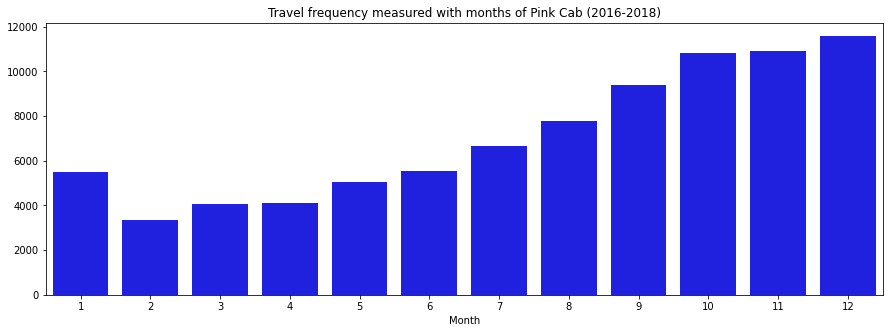

In [39]:

plt.figure(figsize=(15,5))
sns.barplot(x=plot1.index,y=plot1.values, color = "blue")
plt.title("Travel frequency measured with months of Pink Cab (2016-2018)")
plt.show()

#### Yellow Cab

In [40]:
plot2 = df[df.Company=="Yellow Cab"].groupby(["Month"]).Company.count()
plot2

Month
1     19251
2     15045
3     16633
4     17717
5     19247
6     17748
7     21147
8     23921
9     26447
10    30919
11    31454
12    35152
Name: Company, dtype: int64

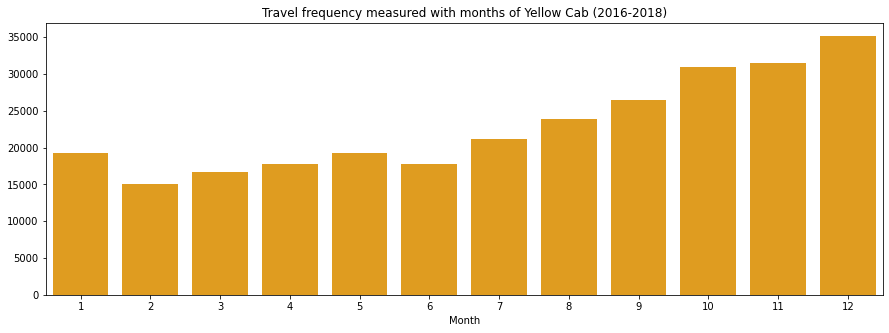

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x=plot2.index,y=plot2.values, color = "orange")
plt.title("Travel frequency measured with months of Yellow Cab (2016-2018)")
plt.show()

Graph Summary: The yellow cab have a significant difference in the travel frequency of cab throughout 3 years of operating compared to the Pink Cab. The highest from Yellow cab is 35152 cab trips in December, the lowest from Yellow cab is in February with the amount of 15045.
The highest from Pink Cab is also in December with the amount of 11584, and the lowest is in February with the amount of 3347.


### 2.The Spread of 2 Cab Company in Cities

#### Yellow Cab

In [42]:
plot3 = df[df.Company=="Yellow Cab"].groupby(["City"]).Transaction_ID.count()
plot3

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

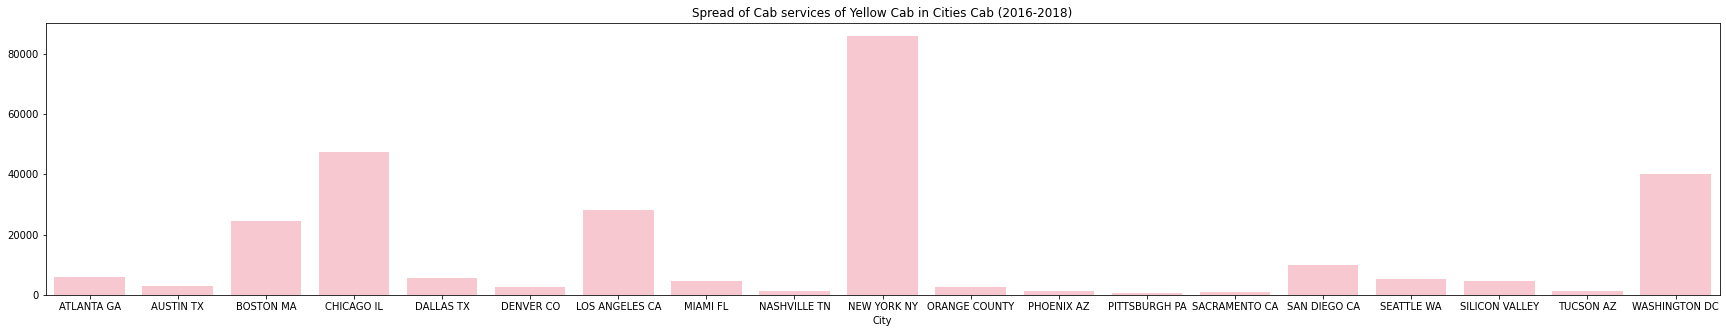

In [43]:
plt.figure(figsize=(30,5))
sns.barplot(x=plot3.index,y=plot3.values, color = "Pink")
plt.title("Spread of Cab services of Yellow Cab in Cities Cab (2016-2018)")
plt.show()

#### 3.Pie Chart (Show percentage of total order of one city on overall order)

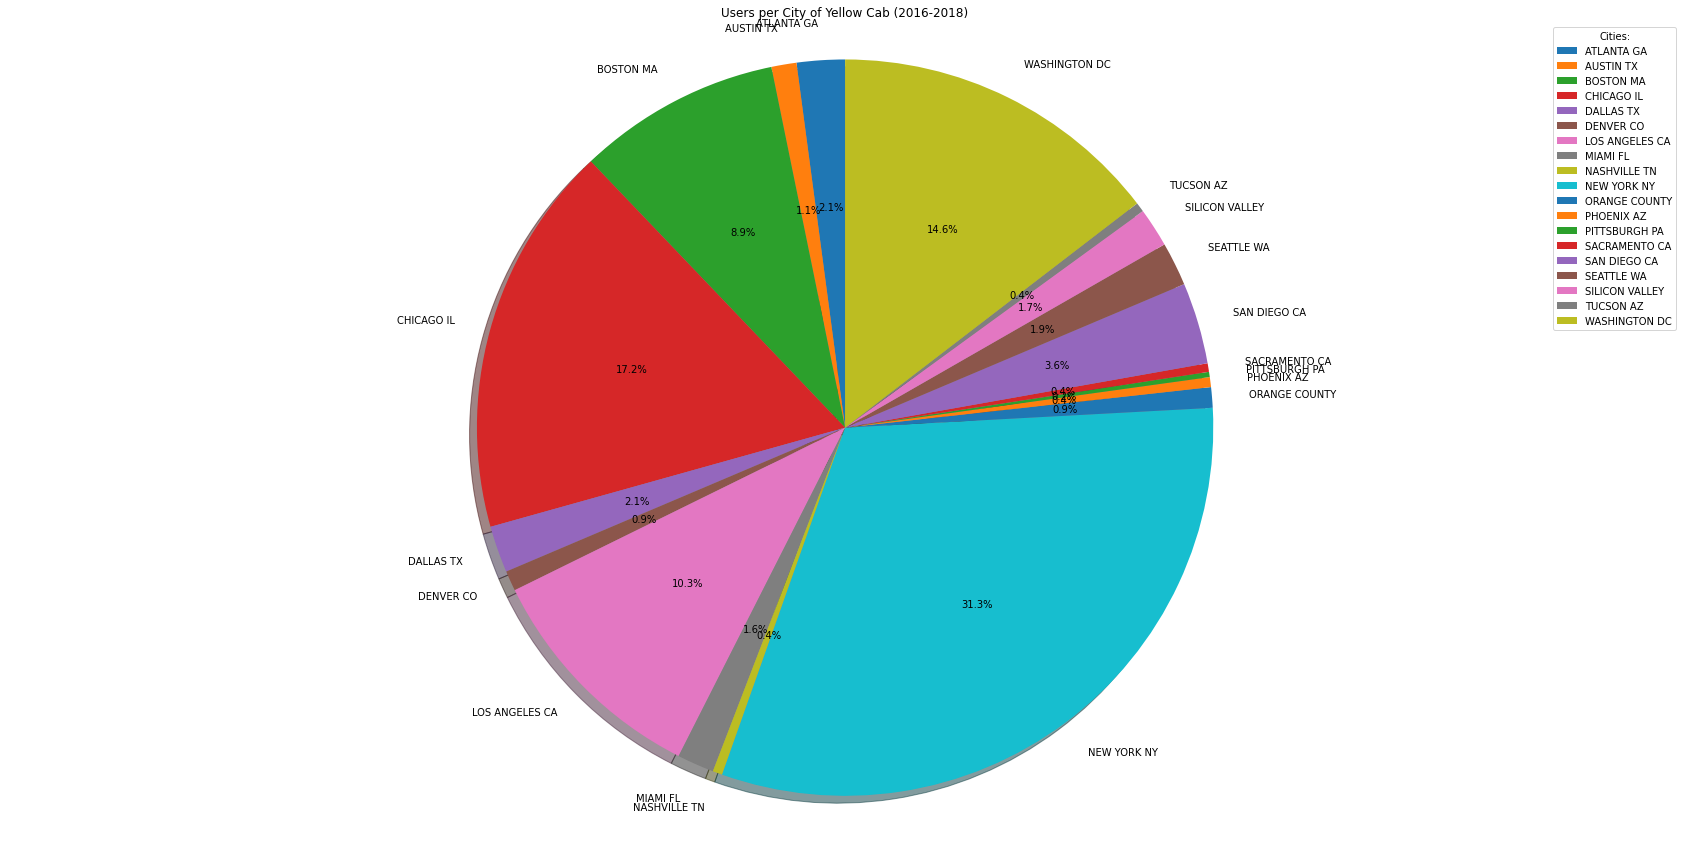

In [44]:
figp, axp = plt.subplots(figsize=(30,15))
axp.pie(plot3.values , labels=plot3.index, autopct="%1.1f%%" ,shadow=True, startangle=90, )
axp.axis("equal")

plt.title("Users per City of Yellow Cab (2016-2018)")
plt.legend(title = "Cities:")
plt.show()

#### Pink Cab

In [45]:
plot4 = df[df.Company=="Pink Cab"].groupby(["City"]).Transaction_ID.count()
plot4

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

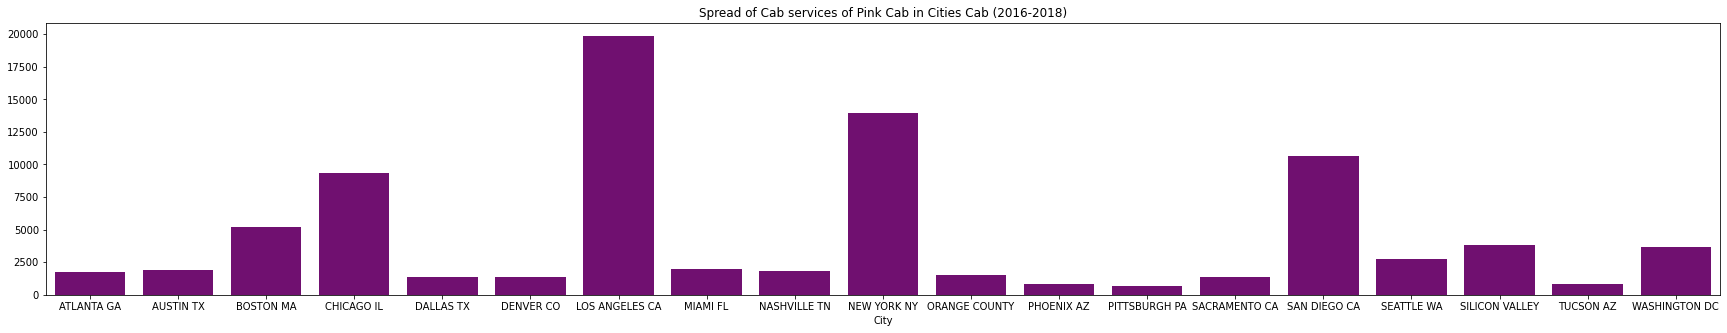

In [46]:
plt.figure(figsize=(30,5))
sns.barplot(x=plot4.index,y=plot4.values, color = "Purple",)
plt.title("Spread of Cab services of Pink Cab in Cities Cab (2016-2018)")
plt.show()

#### 4.Pie Chart (Show percentage of total order of one city on overall order)

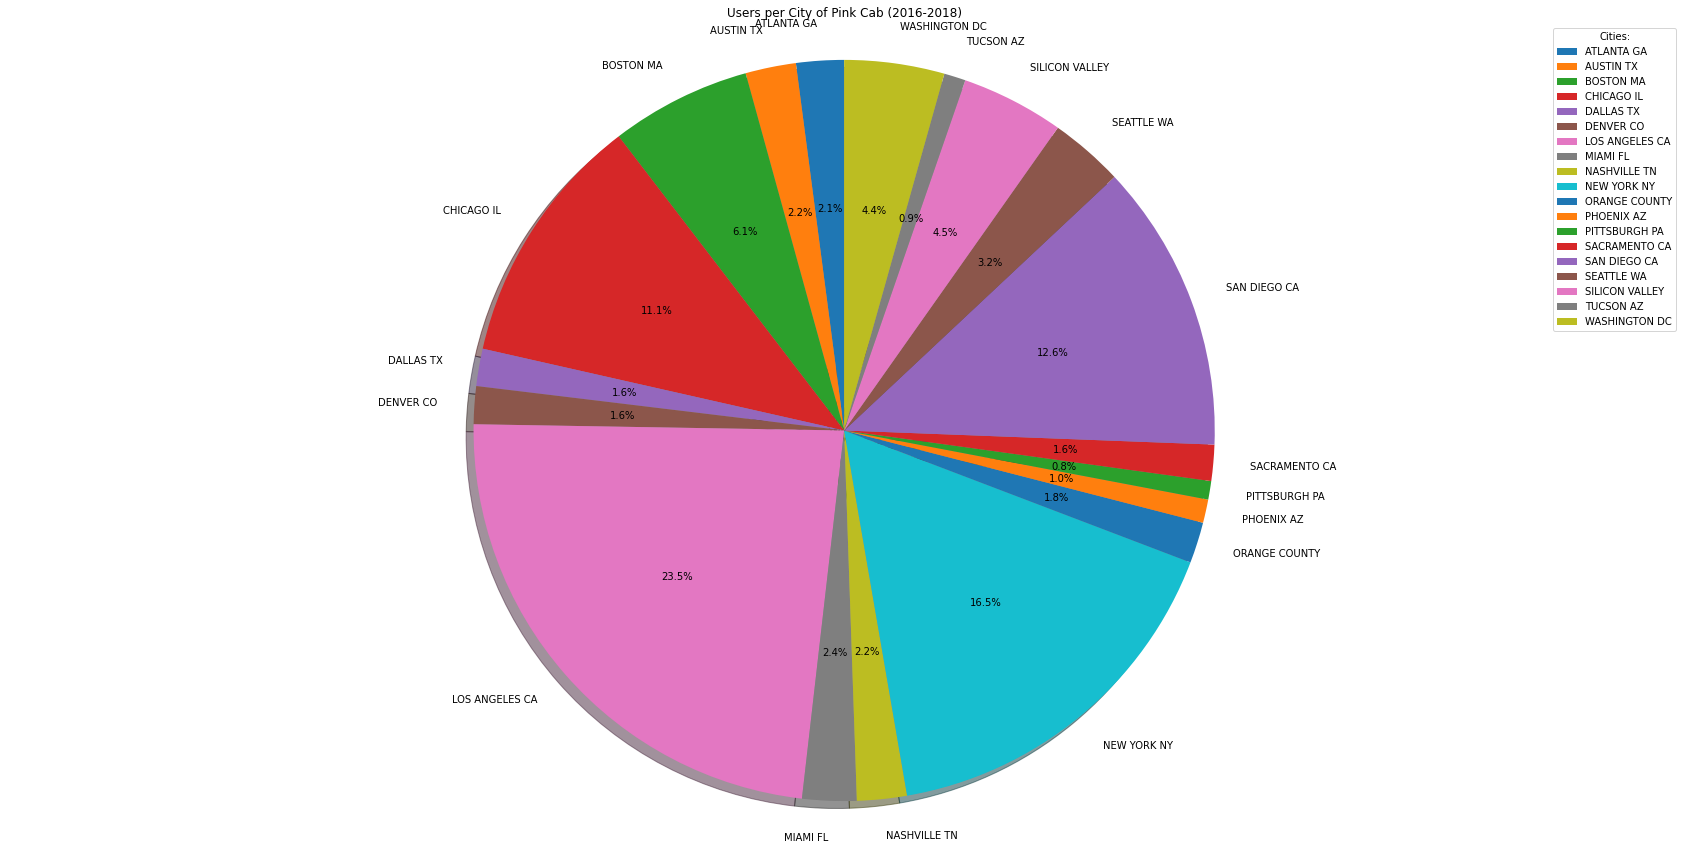

In [59]:
figp, axp = plt.subplots(figsize=(30,15))
axp.pie(plot4.values , labels=plot4.index, autopct="%1.1f%%" ,shadow=True, startangle=90, )
axp.axis("equal")

plt.title("Users per City of Pink Cab (2016-2018)")
plt.legend(title = "Cities:")
plt.show()

## 5.Age distribution from the population using Cab services

### Yellow Cab

In [60]:
plot5 = df[df.Company=="Yellow Cab"].groupby(["Age"]).Transaction_ID.count()

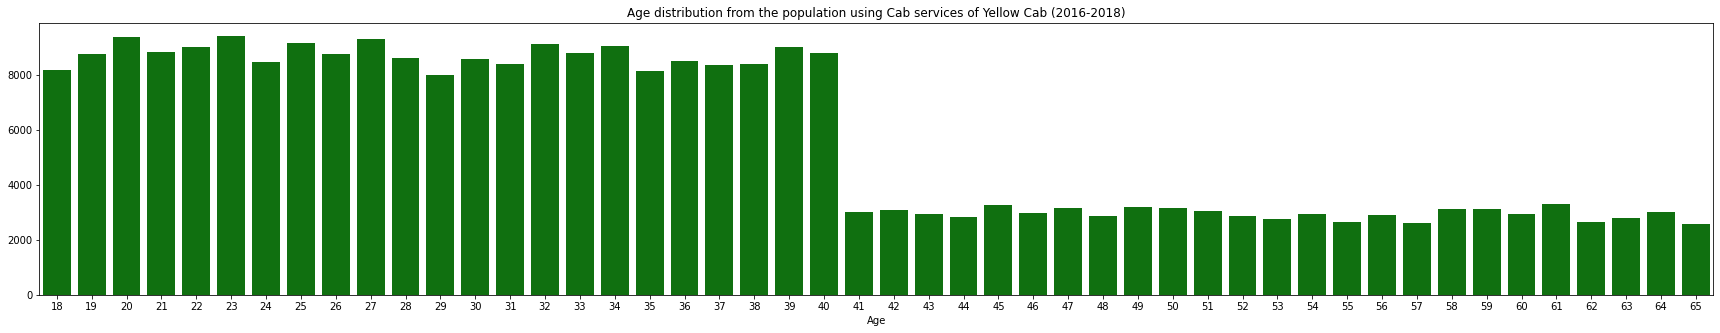

In [81]:
plt.figure(figsize=(30,5))
sns.barplot(x=plot5.index,y=plot5.values, color = "Green",)
plt.title("Age distribution from the population using Cab services of Yellow Cab (2016-2018)")
plt.show()

#### Pink Cab

In [82]:
plot6 = df[df.Company=="Pink Cab"].groupby(["Age"]).Transaction_ID.count()

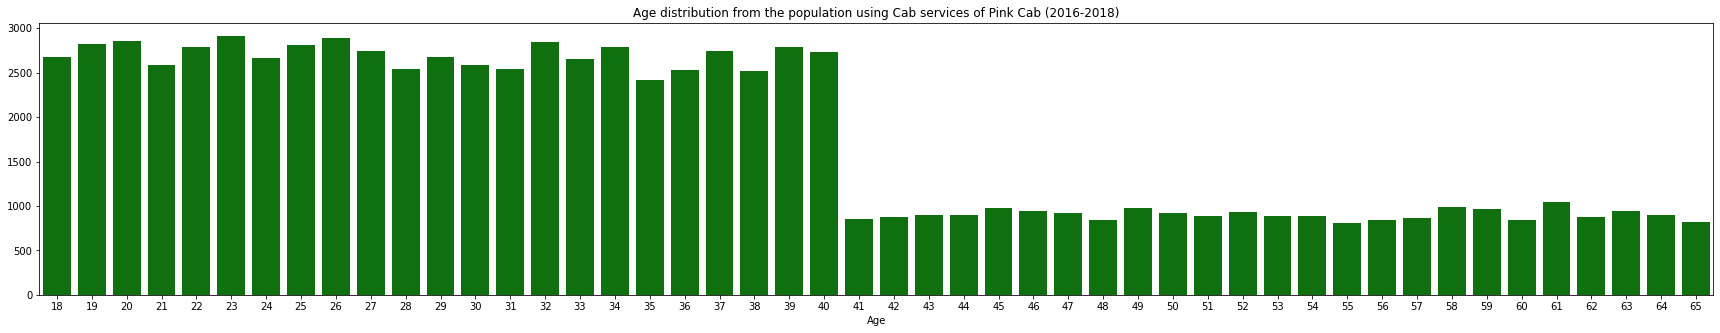

In [83]:
plt.figure(figsize=(30,5))
sns.barplot(x=plot6.index,y=plot6.values, color = "Green",)
plt.title("Age distribution from the population using Cab services of Pink Cab (2016-2018)")
plt.show()

### 6.Profit per year (for 2 cab companies)

In [84]:
df["Profit"] = df["Price_Charged"] - df["Cost_of_Trip"]

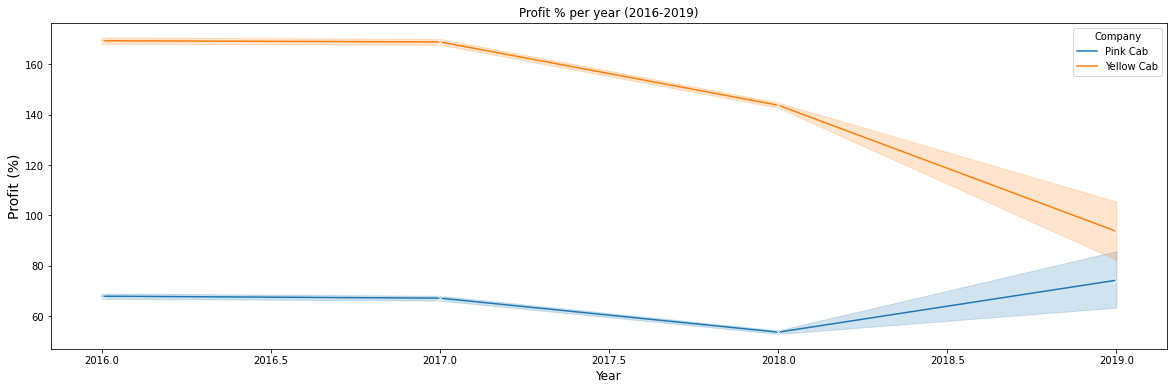

In [85]:
plt.figure(figsize = (20, 6))
sns.lineplot(x="Year", y="Profit", hue="Company", data=df, marker="x")
plt.xlabel("Year", size=12)
plt.ylabel("Profit (%)", size=14)
plt.title("Profit % per year (2016-2019)")
plt.show()

### 6.Profit per Month (for 2 cab companies)

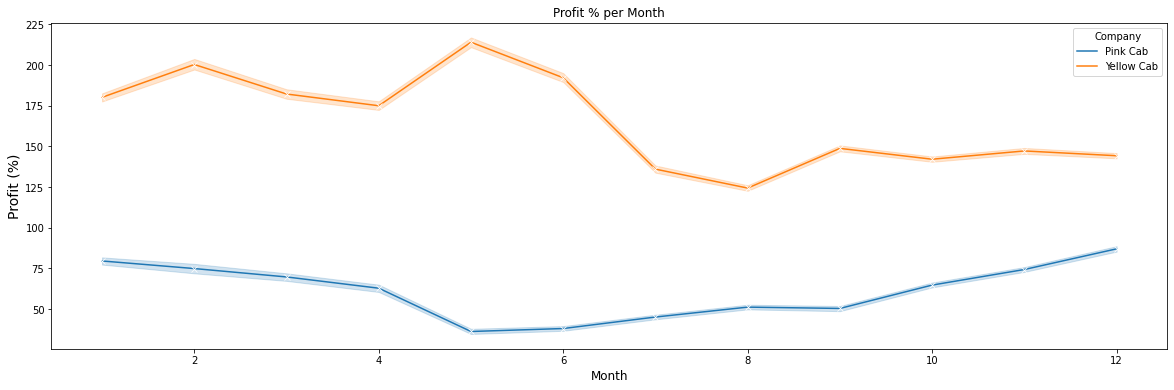

In [86]:
plt.figure(figsize = (20, 6))
sns.lineplot(x="Month", y="Profit", hue="Company", data=df, marker="x")
plt.xlabel("Month", size=12)
plt.ylabel("Profit (%)", size=14)
plt.title("Profit % per Month")
plt.show()

### 7.Price charged to customer per km travelled

Text(0.5, 0, 'Pink Cab KM Travelled')

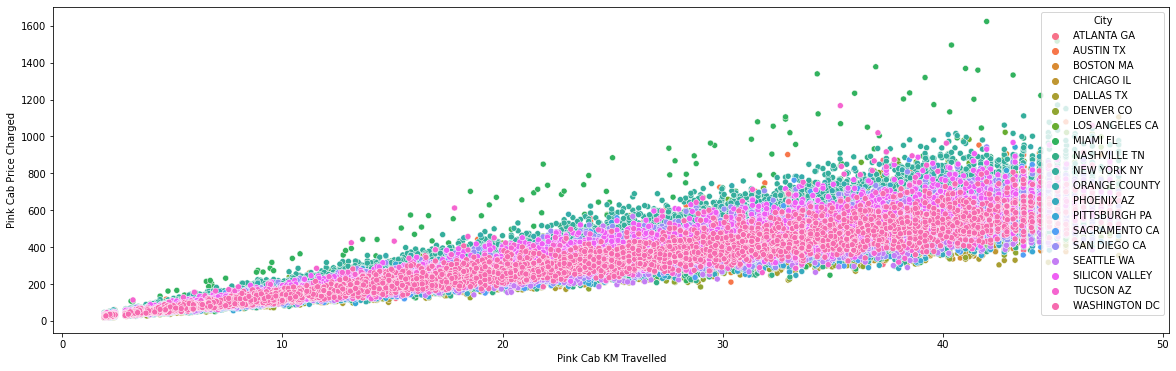

In [87]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df[df.Company=="Pink Cab"], x=df["KM_Travelled"], y=df["Price_Charged"], hue="City")
plt.ylabel("Pink Cab Price Charged")
plt.xlabel("Pink Cab KM Travelled")

Text(0.5, 0, 'Yellow Cab KM Travelled')

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


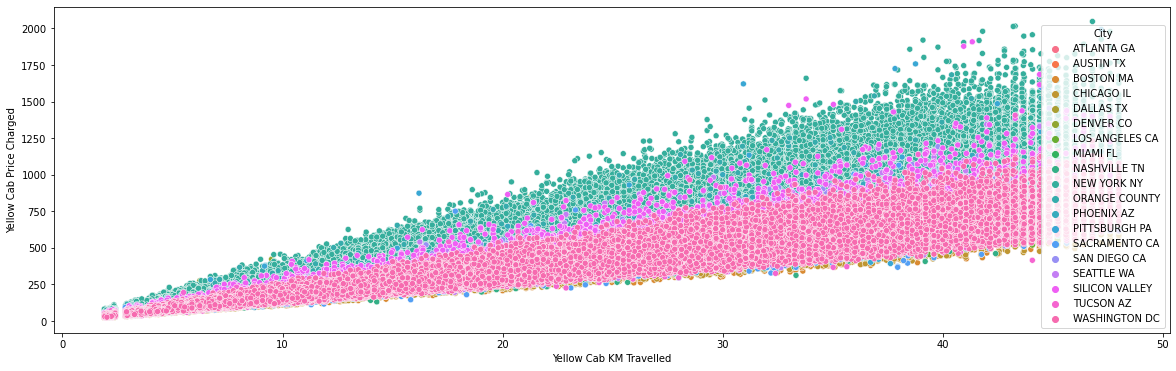

In [88]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df[df.Company=="Yellow Cab"], x=df["KM_Travelled"], y=df["Price_Charged"], hue="City")
plt.ylabel("Yellow Cab Price Charged")
plt.xlabel("Yellow Cab KM Travelled")

In [89]:
# The most expensive trip is the green one
# both of the following cab company have linear priced charged per km travelled
# steady data, not much of the outliers

### 8. Most common gender use the Cab services from 2 given companies

#### Yellow Cab

In [93]:
group_1 = df[df.Company=="Yellow Cab"].groupby("Gender").Transaction_ID.count()

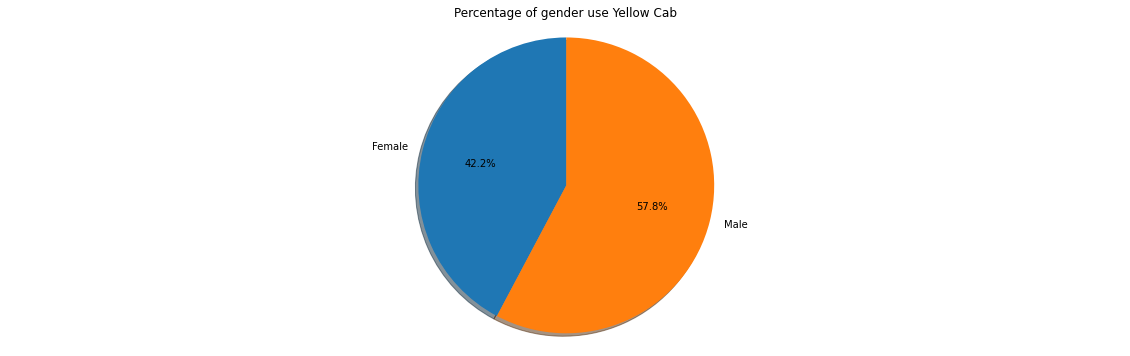

In [94]:
figp, axp = plt.subplots(figsize=(20,6))
axp.pie(group_1.values , labels=group_1.index, autopct="%1.1f%%",shadow=True, startangle=90,)
axp.axis("equal")
plt.title("Percentage of gender use Yellow Cab")
plt.show()

# Pink cab

In [95]:
group_2 = df[df.Company=="Pink Cab"].groupby("Gender").Transaction_ID.count()

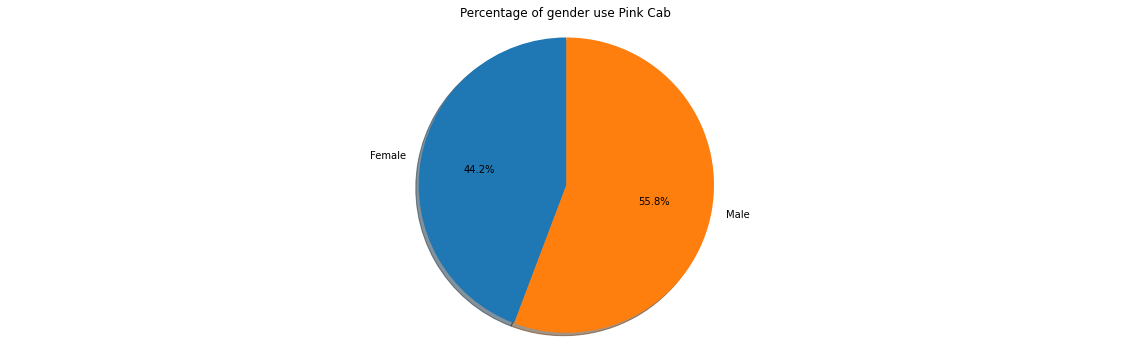

In [96]:
figp, axp = plt.subplots(figsize=(20,6))
axp.pie(group_2.values , labels=group_2.index, autopct="%1.1f%%",shadow=True, startangle=90,)
axp.axis("equal")
plt.title("Percentage of gender use Pink Cab")
plt.show()

### 9.Average user income of 2 cab companies

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


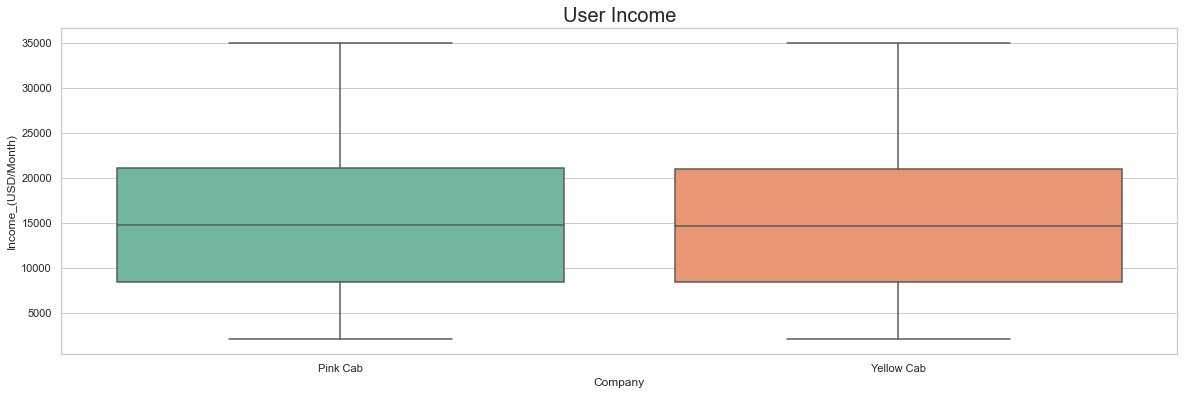

In [97]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize = (20, 6))

ax = sns.boxplot(df["Company"], df["Income_(USD/Month)"],palette="Set2")
plt.title("User Income", fontsize=20)
plt.show()

### 10.Correlation of all variables inside the data frame

In [98]:
df = df.drop(["Month", "Year"], axis=1)


In [99]:
corr = df.corr()
corr

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Age,Income_(USD/Month),Profit
Transaction_ID,1.000000,-0.001429,-0.052902,-0.003462,0.023868,0.013526,-0.016912,-0.001267,-0.001570,-0.087130
KM_Travelled,-0.001429,1.000000,0.835753,0.981848,-0.002311,-0.000428,0.000389,-0.000369,-0.000544,0.462768
Price_Charged,-0.052902,0.835753,1.000000,0.859812,0.326589,0.281061,-0.177324,-0.003084,0.003228,0.864154
Cost_of_Trip,-0.003462,0.981848,0.859812,1.000000,0.015108,0.023628,0.003077,-0.000189,-0.000633,0.486056
Population,0.023868,-0.002311,0.326589,0.015108,1.000000,0.915490,-0.647052,-0.009002,0.011868,0.544079
Users,0.013526,-0.000428,0.281061,0.023628,0.915490,1.000000,-0.610742,-0.005906,0.010464,0.457758
Customer_ID,-0.016912,0.000389,-0.177324,0.003077,-0.647052,-0.610742,1.000000,-0.004735,-0.013608,-0.306527
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.009002,-0.005906,-0.004735,1.000000,0.003907,-0.005093
Income_(USD/Month),-0.001570,-0.000544,0.003228,-0.000633,0.011868,0.010464,-0.013608,0.003907,1.000000,0.006148
Profit,-0.087130,0.462768,0.864154,0.486056,0.544079,0.457758,-0.306527,-0.005093,0.006148,1.000000


<AxesSubplot:>

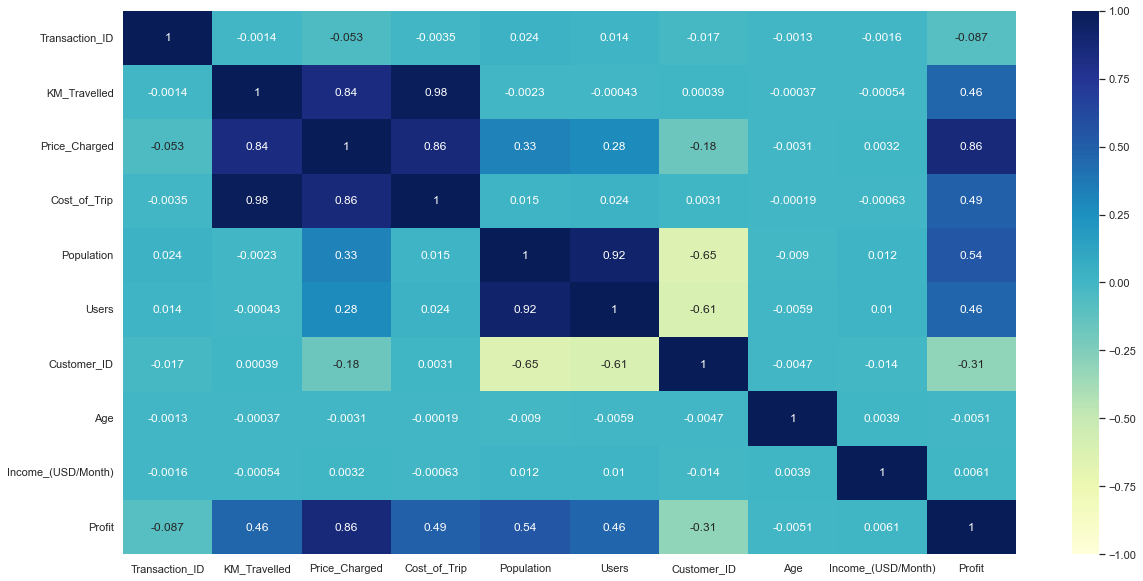

In [100]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='YlGnBu', center=0)

# Hypothesis analysis

Hypothesis 1: Is there any changes to age if profit changes?

    H0: There are no changes to consumer's average age if profit changes
    H1: There are changes to consumer's average age if profit changes

#### Pink Cab

In [101]:
df["Profit"].mean()

137.25319843457842

#### Pink Cab

In [102]:
a = df[(df.Profit <= 137.25319843457842)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Age.mean()
b = df[(df.Profit > 137.25319843457842)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Age.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres no difference for Pink Cab')
else:
    print('We accept null hypothesis that theres is differences for Pink Cab')
    
print('P value is ', p_value)

72699 12012
We accept alternate hypothesis that theres no difference for Pink Cab
P value is  0.04113385102242378


#### Yellow Cab

In [103]:
a = df[(df.Profit <= 137.25319843457842)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Age.mean()
b = df[(df.Profit > 137.25319843457842)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Age.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres no difference for Yellow Cab')
else:
    print('We accept null hypothesis that theres is differences for Yellow Cab')
    
print('P value is ', p_value)

162491 112190
We accept alternate hypothesis that theres no difference for Yellow Cab
P value is  0.0036516330682683363


theres no difference for both companies

In [104]:
a = df[(df.Profit <= 137.25319843457842)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Age.mean()
b = df[(df.Profit > 137.25319843457842)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Age.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres no difference for Pink Cab')
else:
    print('We accept null hypothesis that theres is differences for Pink Cab')
    
print('P value is ', p_value)

72699 12012
We accept alternate hypothesis that theres no difference for Pink Cab
P value is  0.04113385102242378


Hypothesis 2: Is there any changes to age if Population changes?

    H0: There are no changes to consumer's average age if population changes
    H1: There are changes to consumer's average age if population changes

In [105]:
df["Population"].mean().round()

3132198.0

#### Yellow Cab

In [106]:
a = df[(df.Population <= 3132198)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Age.mean()
b = df[(df.Population > 3132198)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Age.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres no difference for Yellow Cab')
else:
    print('We accept null hypothesis that theres is differences for Yellow Cab')
    
print('P value is ', p_value)

188763 85918
We accept alternate hypothesis that theres no difference for Yellow Cab
P value is  1.1217049899132143e-08


#### Pink Cab

In [107]:
a = df[(df.Population <=3132198)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Age.mean()
b = df[(df.Population > 3132198)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Age.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres no difference for Pink Cab')
else:
    print('We accept null hypothesis that theres is differences for Pink Cab')
    
print('P value is ', p_value)

70744 13967
We accept alternate hypothesis that theres no difference for Pink Cab
P value is  1.4607087470014844e-05


theres no difference for both companies

Hypothesis 3: Is there any changes to age if price charged changes?


    H0: There are no changes to consumer's average age if price charged changes
    H1: There are changes to consumer's average age if price charged changes

In [108]:
df["Price_Charged"].mean()

423.4433112590153

#### Yellow Cab

In [109]:
a = df[(df.Price_Charged <= 423.4433112590153)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Age.mean()
b = df[(df.Price_Charged > 423.4433112590153)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Age.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres no difference for Yellow Cab')
else:
    print('We accept null hypothesis that theres is differences for Yellow Cab')
    
print('P value is ', p_value)

136828 137853
We accept null hypothesis that theres is differences for Yellow Cab
P value is  0.3413547683791115


#### Pink Cab

In [110]:
a = df[(df.Price_Charged <=423.4433112590153)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Age.mean()
b = df[(df.Price_Charged > 423.4433112590153)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Age.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres no difference for Pink Cab')
else:
    print('We accept null hypothesis that theres is differences for Pink Cab')
    
print('P value is ', p_value)

60997 23714
We accept null hypothesis that theres is differences for Pink Cab
P value is  0.23110176404877747


There will be differences to consumer's average age if price charged changes


-Consumer's average age is increased if price increased and vice versa.
- Solution: Charged price lower a bit(5% of the total price charged to consumers) to attract more younder consumers
